In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
%matplotlib inline

In [8]:
st=input("Enter code of stock")
data=yf.download(st,"2008-01-01","2021-01-18")
data

Enter code of stockNG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,7.572,7.876,7.564,7.850,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,7.967,53775
...,...,...,...,...,...,...
2021-01-11,2.600,2.811,2.589,2.747,2.747,177248
2021-01-12,2.794,2.899,2.718,2.753,2.753,201432
2021-01-13,2.737,2.826,2.708,2.727,2.727,169240


In [17]:
x=data.drop("Close",axis=1)
y=data["Close"]

<AxesSubplot:xlabel='Volume', ylabel='Close'>

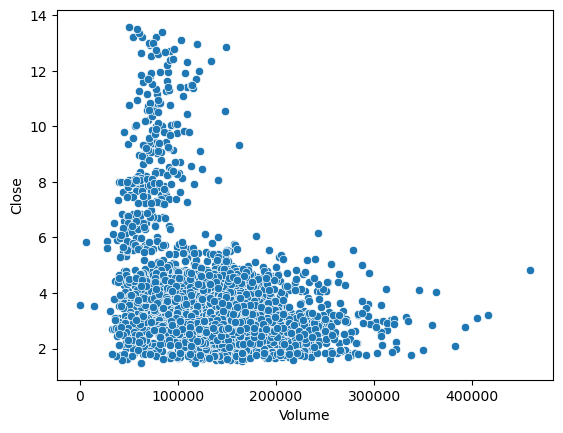

In [18]:
sns.scatterplot(x='Volume',y='Close',data=data)

In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,13.577000,459196.000000


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
x_train.shape

(2625, 5)

In [23]:
x_test.shape

(657, 5)

In [29]:
y_train.shape

(2625,)

In [24]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
print("slope=",lr.coef_)
print("intercept=",lr.intercept_)

slope= [-2.18833515e-14  1.87877427e-14  1.73087075e-15  1.00000000e+00
 -5.04605805e-20]
intercept= 7.993605777301127e-15


ValueError: x and y must be the same size

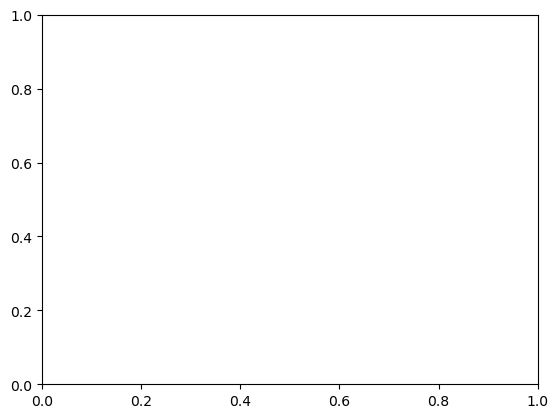

In [27]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train))


In [30]:
print(x_train,lr.predict(x_train))

             Open   High    Low  Adj Close  Volume
Date                                              
2017-12-12  2.801  2.844  2.673      2.678  312864
2014-12-26  3.067  3.098  2.973      3.007   37868
2018-11-23  4.241  4.563  4.222      4.308  121022
2009-11-17  4.632  4.734  4.511      4.530  144785
2020-04-06  1.650  1.755  1.630      1.731  187962
...           ...    ...    ...        ...     ...
2010-02-23  4.915  4.934  4.766      4.778   66648
2016-09-19  2.956  2.958  2.890      2.934  106540
2012-11-23  3.902  3.933  3.830      3.901   50250
2015-07-24  2.807  2.815  2.773      2.776   62907
2020-10-21  2.897  3.053  2.890      3.023  154373

[2625 rows x 5 columns] [2.67799997 3.00699997 4.30800009 ... 3.90100002 2.77600002 3.023     ]


In [31]:
a=lr.score(x_test,y_test)
a

1.0

In [36]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,lr.predict(x_test))
mse

7.051645041942809e-30

In [41]:
from sklearn.linear_model import Lasso,Ridge
la=Lasso().fit(x_train,y_train)
mse=mean_squared_error(y_test,la.predict(x_test))
mse
ri=Ridge().fit(x_train,y_train)
mse2=mean_squared_error(y_test,ri.predict(x_test))
mse2

2.7275262515636378e-05